# Lab 6: Clustering
In this lab we'll try to get a better sense of all the clustering algorithms discussed in class. One of the many reasons to cluster is that it can help us better visualize and understand our data. To that end, we'll also get some more practice with data visualization techniques that may be helpful for your projects and future data analysis.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


We'll begin by messing around the Iris dataset, which is a fairly easy, small 3-way classification dataset. The dataset consists of 150 irises that each fall into one of 3 classes(Setosa, Versicolour, and Virginica). Each iris comes with 4 features: sepal length, sepal width, petal length, and petal width.

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


To get a better sense of the distributions of the data. Let's first plot histograms of each of the four features:

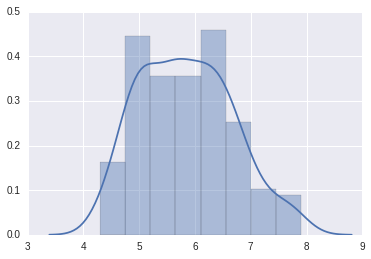

In [13]:
sns.distplot(X[:,0])

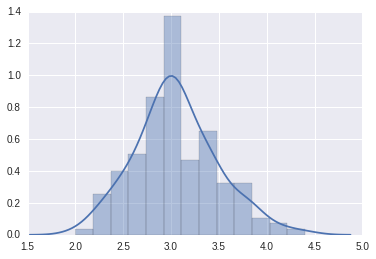

In [14]:
sns.distplot(X[:,1])

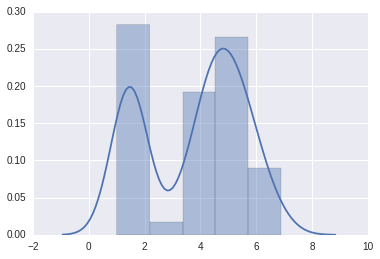

In [15]:
sns.distplot(X[:,2])

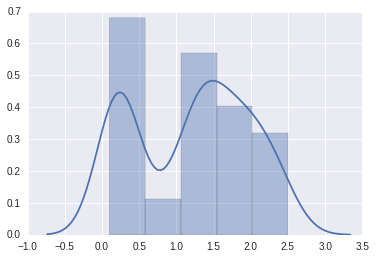

In [16]:
sns.distplot(X[:,3])

From the names of the features, it probably makes most sense to scatter the sepal length vs the sepal width and the petal length vs petal width. Use plt.scatter to visualize 

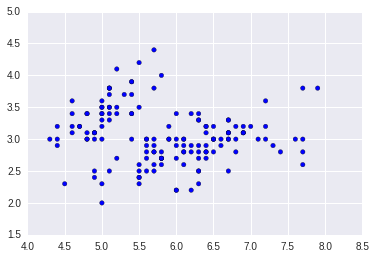

In [24]:
plt.scatter(X[:,0], X[:,1])

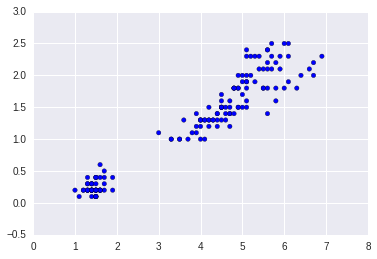

In [25]:
plt.scatter(X[:,2], X[:,3])

In [26]:
# Make a dataframe out of the data to make it easier to do filtering/grouping operations later
col_names = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid']
df = pd.DataFrame(data.data)
df.rename(columns=lambda x: col_names[x], inplace=True)
df['target'] = data.target

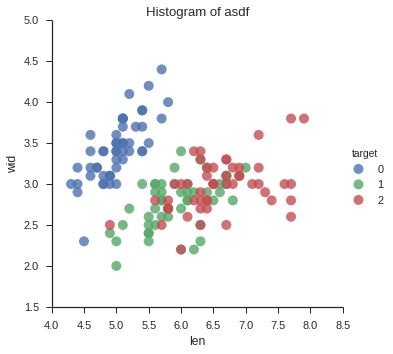

In [29]:
# Scatter the sep_len vs sep_wid
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('sep_len', 'sep_wid',
           data=df,
           fit_reg=False,
           hue="target",
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('Histogram of asdf')
plt.xlabel('len')
plt.ylabel('wid')

# This is what the scatter plot should look like:

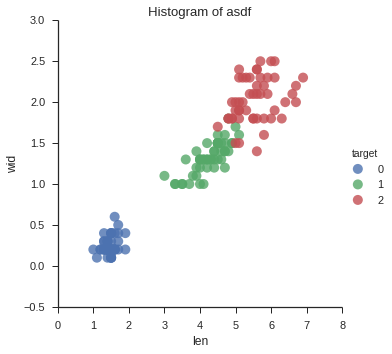

In [30]:
sns.lmplot('pet_len', 'pet_wid',
           data=df,
           fit_reg=False,
           hue="target",
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('Histogram of asdf')
plt.xlabel('len')
plt.ylabel('wid')

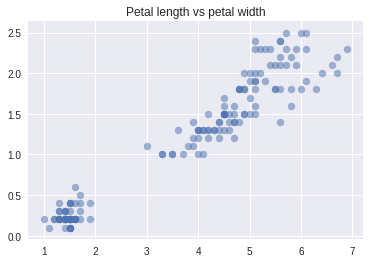

In [82]:
# Scatter the pet_len vs pet_wid
# YOUR CODE HERE
# This is what the scatter plot should look like:

It may be hard to see anything interesting from just monochromatic scatter plots. Let's color in the datapoints according to their class. Hint: try grouping by the target value and then do plt.scatter on each group with different colors.

In [93]:
# Write a function to plot a scatter plot of two columns of a dataframe that color points
# according to their class.
# YOUR CODE HERE

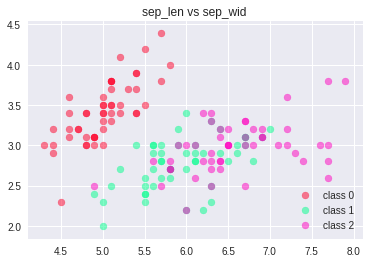

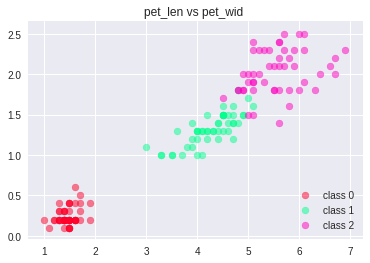

In [94]:
# This is what the output should look like:

From the plots, its clear that we can easily cluster the data into 3 clusters. Let's see if KMeans and Meanshift can recover these clusters.

## KMeans
Now that we have a good sense of what the Iris dataset looks like, we'll try running a few clustering algorithms on the data starting with KMeans.
Ref: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Run KMeans with n_clusters = 2, 3, 4 plot a color coded(according to the cluster value) scatter plot for petal length vs petal width(or any two features of your choice). You should be able to modify the function you wrote above to color the datapoints according to its cluster value.

In [33]:
df.columns

Index(['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'target'], dtype='object')

In [40]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN



result = KMeans(n_clusters=3).fit(df[['pet_len', 'pet_wid']])
print(result)

df['class'] = result.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


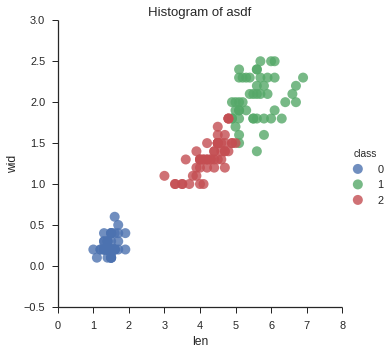

In [41]:
sns.lmplot('pet_len', 'pet_wid',
           data=df,
           fit_reg=False,
           hue="class",
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('Histogram of asdf')
plt.xlabel('len')
plt.ylabel('wid')

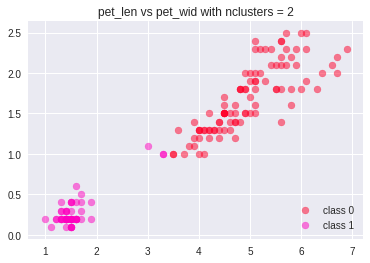

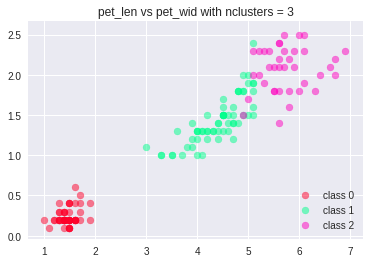

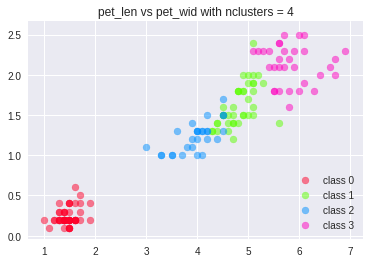

In [101]:
# This is what the output should look like:

## MeanShift
Use MeanShift to cluster the data points. Remember that the bandwidth parameter of MeanShift determines how much to weigh the neighbors of each point when cluster centroids are recomputed. Vary the bandwidth parameter from very low to very high and see how the clustering changes. As with KMeans, plot a color coded scatter plot.

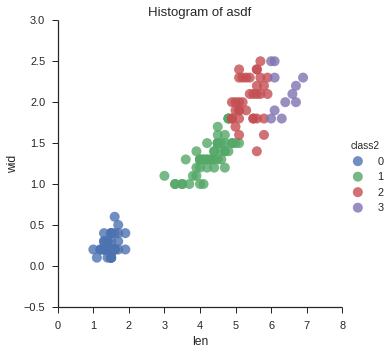

In [52]:
from sklearn.cluster import MeanShift

result = MeanShift(bandwidth=0.5).fit(df[['pet_len', 'pet_wid']])

df['class2'] = result.labels_

sns.lmplot('pet_len', 'pet_wid',
           data=df,
           fit_reg=False,
           hue="class2",
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('Histogram of asdf')
plt.xlabel('len')
plt.ylabel('wid')

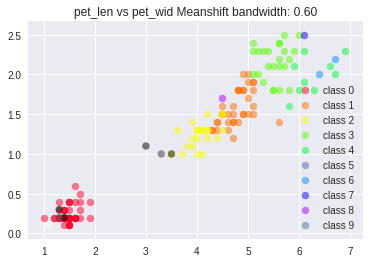

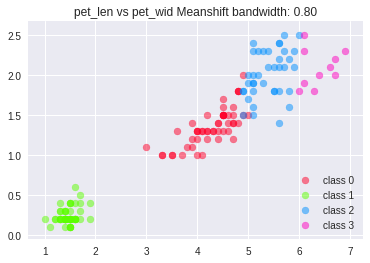

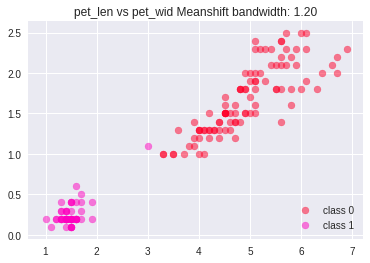

In [108]:
# YOUR CODE HERE
# Sample output:

### DBSCAN
The last clustering algorithm we'll explore in today's lab is dbscan.
Ref: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html
dbscan has many parameters that you can set but we will mostly be concerned with:
- eps: max distance 
- min_samples: minimum number of points within a neighborhood of a point for it to be considered a "core" point

Run DBScan with varying epsilon and min_sample values to get a sense of how they affect the resulting clusters. First fix the min_sample values and vary epsilon to see how epsilon affects the clustering. Then use the epsilon that gave the "best" results and vary the min_sample values. Plot the color coded scatter plots as we did for KMeans and MeanShift. How do the clusters look as eps and min_samples are varied?

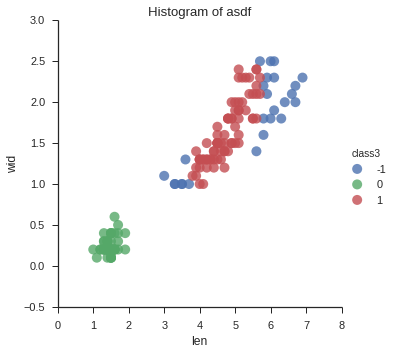

In [65]:
from sklearn.cluster import dbscan

core_samples, labels = dbscan(df[['pet_len', 'pet_wid']], eps=0.4, min_samples=20)

df['class3'] = labels

sns.lmplot('pet_len', 'pet_wid',
           data=df,
           fit_reg=False,
           hue="class3",
           scatter_kws={"marker": "D",
                        "s": 100})
plt.title('Histogram of asdf')
plt.xlabel('len')
plt.ylabel('wid')

### Applying Clustering to Real Data
The Iris dataset is a super simple dataset but served us well in better understanding kmeans, meanshift and dbscan. Let's now apply these clustering techniques to real data. For this we'll use the credit-loan dataset from assignment 2.

In [199]:
loan_df = pd.read_csv('credit-data.csv')
print(loan_df.count())

PersonID                                150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
zipcode                                 150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64


### Prepping the Data
Before we do any sort of clustering, we need to prep the data a bit. Use the functions you'e written for your ML pipeline to clean the data, deal with missing values. We'll also get rid of the categorical features(PersonID and zipcode) - why shouldn't we include these two features when clustering on this data?

In [223]:
# Do any necessary preprocessing: fill nans, drop rows if needed, etc

Now apply any of the three clustering algorithms from above on the data.

In [129]:
# Do some clustering with kmeans/meanshift/dbscan

We'd like to visualize the clusters just as we did for the Iris Dataset, but we can't realy visualize 10 dimensions. So instead, we'll use PCA to project our data onto a 2-dimensional subspace and then plot our 2-d points. Before we do PCA, also make sure to normalize the columns!  If we don't normalize, a column like MonthlyIncome will completely drown out all the other columns which almost all have values in the range 0-10.

In [201]:
# Normalize the columns

In [202]:
from sklearn.decomposition import PCA
# Run PCA to get a 2-dimensional projection of the data

Scatter the 2-dimensional projected datapoints color coded by cluster value and then do the same plot except color coded by their SeriousDlqin2yrs value. Try to reuse some of the functions you've written for the previous part of of the lab.

It can be hard to see any coherent pattern when there is so much data. Here are some ways around this:
- Plot a smaller subset of the data
- Plot different classes/clusters of the data separately(but using shared axes) 

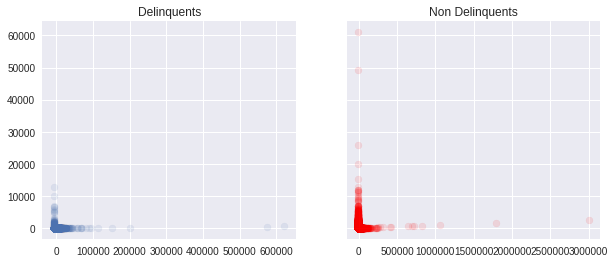

In [213]:
delinqs = small_df[small_df['SeriousDlqin2yrs'] == 1]
nondelinqs = small_df[small_df['SeriousDlqin2yrs'] == 0]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax1.scatter(delinqs[0], delinqs[1], alpha=0.1)
ax1.set_title('Delinquents')
ax2.set_title('Non Delinquents')
ax2.scatter(nondelinqs[0], nondelinqs[1], alpha=0.1, c='r')
plt.show()

We can sort of see that the datapoints that have SeriousDlinq2yrs = 0 are slightly more localized around the origin, than the ones datapoints with SeriousDlinq2yrs = 1 which are more spread out along the y-axis. This suggests that this spatial information might be useful for classification.

### Using cluster centers as an extra feature

To see if cluster centers are in fact a useful feature, split the data into a training set and a testing set. Run RandomForestClassifier on the training set, and evaluate it(with w/e scoring criteria you want - AUC might be good) on the testing set. Then repeat it with the cluster centers added as an extra feature. Does the added feature improve the classification?

Feel free to use the parameters you found during cross validation in HW2 to save time.

In [215]:
from sklearn.ensemble import RandomForestClassifier


### Food for thought
- Does it matter if you perform clustering and then PCA or PCA then clustering?
- How can we better select the parameters in our clustering algorithms? Recall that we did cross validation to select parameters in all the models we've seen thus far. Can we do cross-validation for finding the cluster parameters?